In [1]:
%cd ../..

C:\Users\ManuJoseph\OneDrive - Thoucentric\Work\Projects\Playground\AdvancedTimeSeriesForecastingBook\Github\Modern-Time-Series-Forecasting-with-Python-


In [2]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from plotly.subplots import make_subplots
np.random.seed(0)

Adapted from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

In [3]:
os.makedirs("imgs/chapter_5", exist_ok=True)

In [4]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

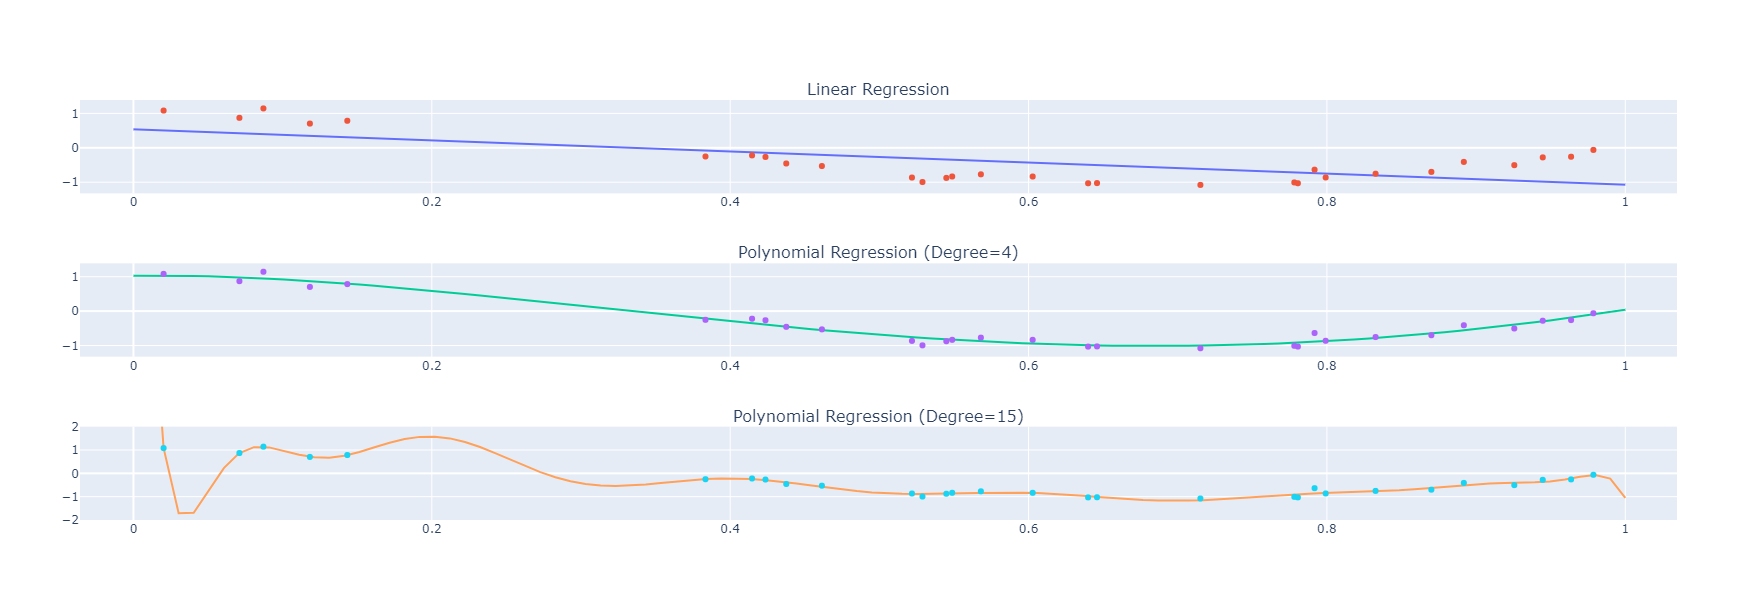

In [5]:
fig = make_subplots(rows=3, cols=1, subplot_titles=("Linear Regression", "Polynomial Regression (Degree=4)", "Polynomial Regression (Degree=15)"))
X_test = np.linspace(0, 1, 100)
ideal_output = true_fun(X_test)
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)
    model_output = pipeline.predict(X_test[:, np.newaxis])
    fig.add_trace(
        go.Scatter(
            x=X_test,
            y=model_output,
            name="Linear Regression" if degrees[i]==1 else f"Polynomial Regression (Degree={degrees[i]})",
            mode="lines"
        ), row=i+1, col=1)
    fig.add_trace(
        go.Scatter(
            x=X,
            y=y,
            name="Samples",
            mode="markers"
        ), row=i+1, col=1)
fig.update_layout(
    # yaxis_range=[-2,2],
    autosize=False,
    width=700,
    height=600,
    showlegend=False
)
fig.update_yaxes(range=[-2, 2], row=3, col=1)
fig.write_image("imgs/chapter_5/under_vs_over_fitting.png")
fig.show()